# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

from seaborn import load_dataset

In [2]:
tips = load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


# Tratamento dos dados

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   tip_pct     244 non-null    float64 
 8   net_bill    244 non-null    float64 
dtypes: category(4), float64(4), int64(1)
memory usage: 11.2 KB


In [4]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
tip_pct       0
net_bill      0
dtype: int64

In [5]:
tips.describe()

,total_bill,tip,size,tip_pct,net_bill
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.202123,16.787664
std,8.902412,1.383638,0.951100,0.163385,8.032459
min,3.070000,1.000000,1.000000,0.036955,2.070000
25%,13.347500,2.000000,2.000000,0.148274,11.000000
50%,17.795000,2.900000,2.000000,0.183110,14.555000
75%,24.127500,3.562500,3.000000,0.236821,20.685000
max,50.810000,10.000000,6.000000,2.452381,43.170000


C:\Users\moona\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moona\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moona\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moona\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

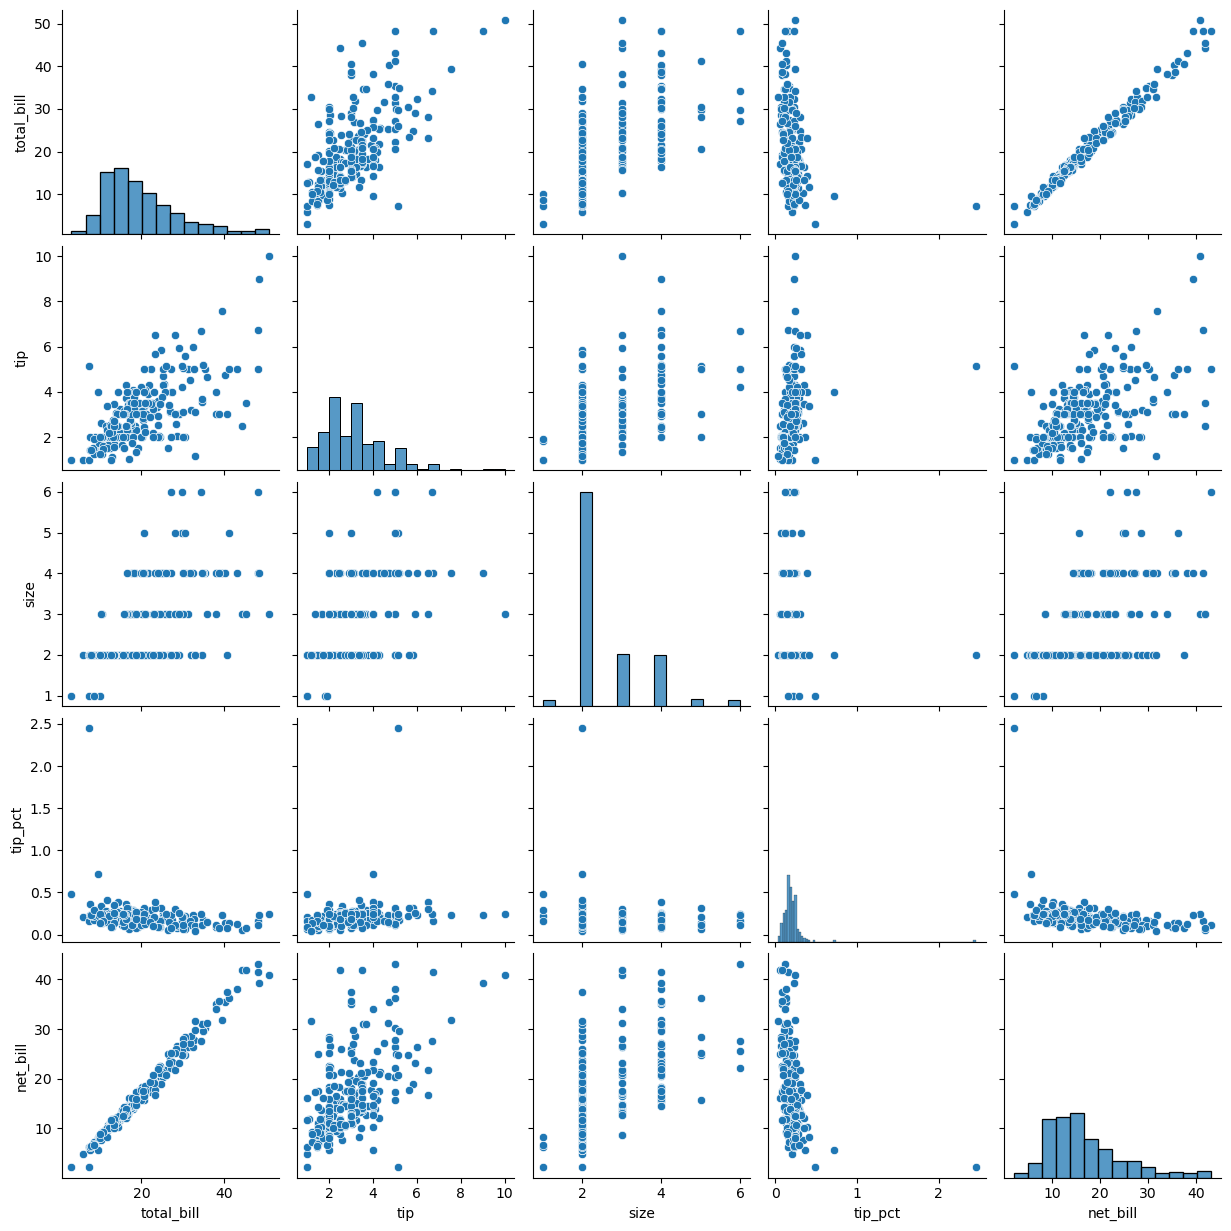

In [7]:
#Analisando as variáveis
sns.pairplot(tips);

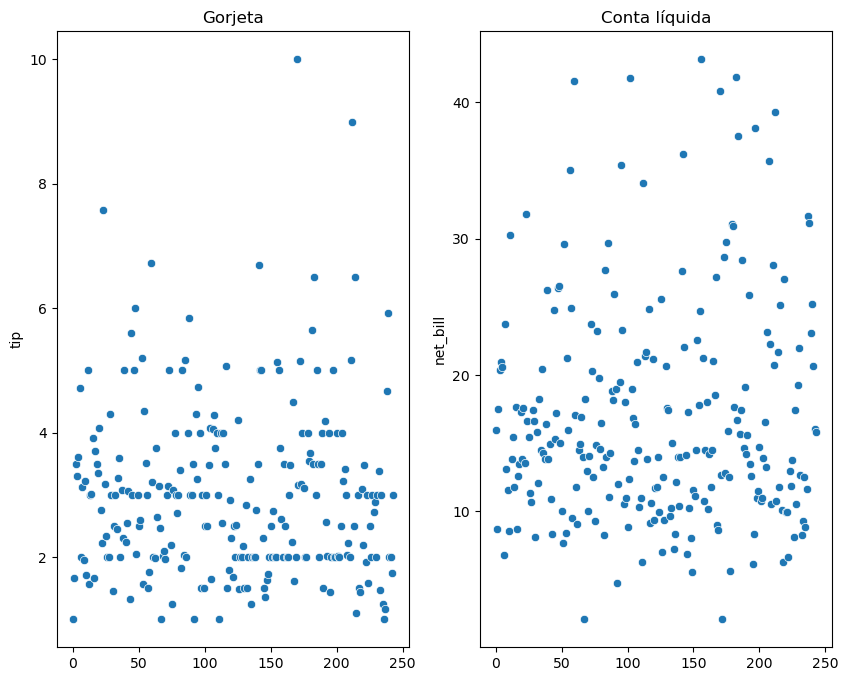

In [8]:
#Plotando gráficos

fig , ax = plt.subplots(1 , 2 ,figsize = (10 , 8))

#Dispersão variável Tip
sns.scatterplot(tips['tip'] , ax = ax[0])
ax[0].set_title('Gorjeta')

#Dispersão variável Net_Bill
sns.scatterplot(tips['net_bill'] , ax = ax[1])
ax[1].set_title('Conta líquida')


plt.show()

In [9]:
#Ajustando modelo

reg1 = smf.ols('tip ~ net_bill' , tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           5.02e-23
Time:                        22:56:18   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

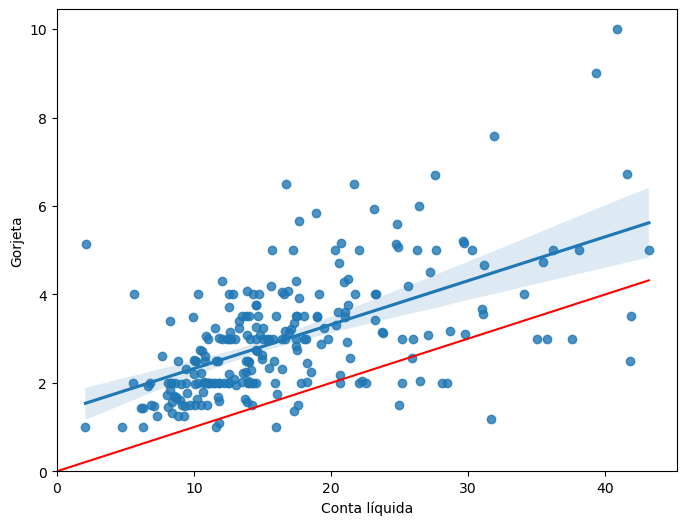

In [10]:
#plotando gráfico de regressão das variáveis
fig , ax = plt.subplots(figsize = (8 , 6))

sns.regplot(x = 'net_bill' , y = 'tip' , data = tips)

ax.set_xlabel('Conta líquida')
ax.set_ylabel('Gorjeta')

#plotando linha 10%
x = np.linspace(0 , tips['net_bill'].max() , 100)
y = .1 * x

plt.xlim(left = 0)
plt.ylim(bottom = 0)

plt.plot(x , y , 'r')

plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [11]:
reg2 = smf.ols('tip_pct ~ net_bill' , data = tips).fit()

In [12]:
reg2 = smf.ols('tip_pct ~ net_bill' , data = tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.52e-06
Time:                        22:57:26   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

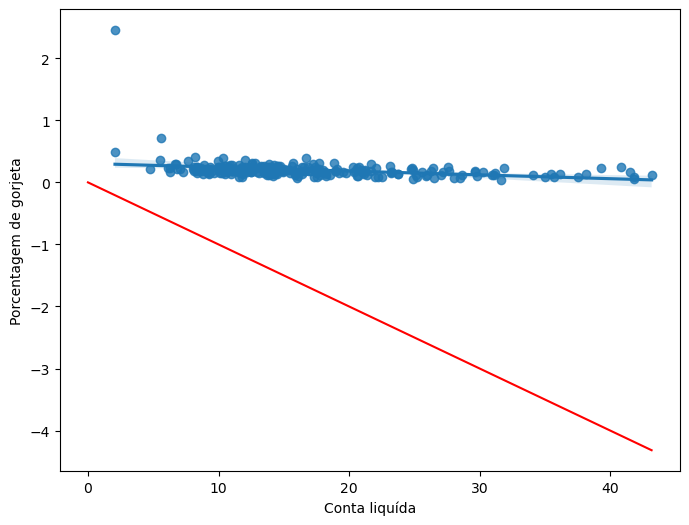

In [13]:
#Plotando gráfico de regressão das variáveis

fig , ax = plt.subplots(figsize = (8 , 6))

sns.regplot(x = 'net_bill' , y = 'tip_pct' , data = tips)

ax.set_xlabel('Conta liquída')
ax.set_ylabel('Porcentagem de gorjeta')

#Plotando linha 10%
x = np.linspace(0 , tips['net_bill'].max())
y = .1 * - x


plt.plot(x , y , 'r')

plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

A relação entre a gorjeta e a conta liquída possui um comportamento esperado. A medida que a conta aumenta, a gorjeta dada é maior. Diferentemente, a regressão entre a porcentagem da gorjeta em relação a conta liquída, sugere que à medida que o valor total da conta aumenta, a porcentagem da gorjeta em relação ao valor total da conta tende a diminuir já que contas maiores, sugerem uma gorjeta maior, o que faz com que as pessoas se sintam menos inclinadas a dar uma gorjeta proporcional ao total da conta.

Os R²s podem ser comparados diretamente, já que ambos medem a proporção da variabilidade de cada variável.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [14]:
tip_pct_pred = reg2.fittedvalues
tip_pct_pred

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [15]:
tip_pred = tip_pct_pred * tips['net_bill']
tip_pred

0      3.309254
1      2.186938
2      3.461450
3      3.668785
4      3.699998
         ...   
239    3.773120
240    3.790751
241    3.684707
242    3.319003
243    3.287232
Length: 244, dtype: float64

In [16]:
reg4 = smf.ols('tip ~ tip_pred' , data = tips).fit()

In [17]:
print(reg2.rsquared)
print(reg4.rsquared)

0.09129084920662933
0.12112385704528728
